In [4]:
import numpy as np
import matplotlib.pyplot as plt #importing for get the images and showing them
import pandas as pd
import soundfile as sf
import urllib.request, urllib.error, urllib.parse
from bs4 import BeautifulSoup
from collections import Counter
import string

In [5]:
#reading imgages in by pylot
p1 = plt.imread("1.png")
p2 = plt.imread("2.png")
p3 = plt.imread("3.png")
p4 = plt.imread("4.png")
p5 = plt.imread("5.png")


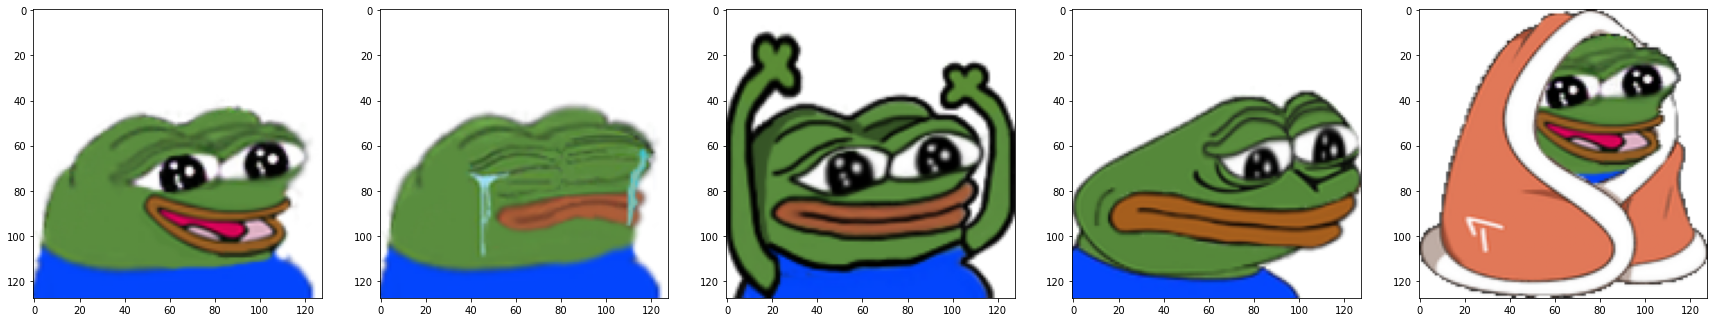

In [6]:
#task 1
#show images and the matrixes of the images
plt.figure(figsize=(30,30)) #resizing for better images show
plt.subplot(1,5,1) #sumplots to put each image next to each other
plt.imshow(p1)
plt.subplot(1,5,2)
plt.imshow(p2)
plt.subplot(1,5,3)
plt.imshow(p3)
plt.subplot(1,5,4)
plt.imshow(p4)
plt.subplot(1,5,5)
plt.imshow(p5)
np.set_printoptions(threshold=np.inf)#show all the matrix values without truncation
#in the next 5 cell I'm showing the matrix values in different cells

In [ ]:
print(p1)

In [ ]:
print(p2)

In [ ]:
print(p3)

In [ ]:
print(p4)

In [ ]:
print(p5)

In [7]:
#task2
#for making the expected value to be 0 we need to subtract the mean of the picture for each pixel
#for the devination for 1 we need to divide by the divination of the picture for each pixel
#mean
def meancolor(singlecolorimage):#calcualting a single channeled image mean and subtracting at each the pixels of the image
    return singlecolorimage-singlecolorimage.mean() 

def meanconcat(image): #calling the meancolor function and creating the expected value to be 0
    image[:,:,0] = meancolor(image[:,:,0])
    image[:,:,1] = meancolor(image[:,:,1])
    image[:,:,2] = meancolor(image[:,:,2])
    return image

#devination
def devcolor(singlecolorimage):#calcualting a single channeled image devination and dividing at each the pixels of the image
    return singlecolorimage/singlecolorimage.std() 

def devconcat(image): #calling the divcolor function and creating the devination to be 1
    image[:,:,0] = devcolor(image[:,:,0])
    image[:,:,1] = devcolor(image[:,:,1])
    image[:,:,2] = devcolor(image[:,:,2])
    return image

def printmeandev(image): #calling the function to calculate the mean and the deviation of the images, and printing the expected values and the expected diviation
    image = devconcat(meanconcat(image))
    print("Red mean and deviation")
    print(image[:,:,0].mean())
    print(image[:,:,0].std())
    
    print("Green mean and deviation")
    print(image[:,:,1].mean())
    print(image[:,:,1].std())
    
    print("Blue mean and deviation")
    print(image[:,:,2].mean())
    print(image[:,:,2].std())
    print("\n")
#printing each images
printmeandev(p1)
printmeandev(p2)
printmeandev(p3)
printmeandev(p4)
printmeandev(p5)


Red mean and deviation
-8.940697e-08
1.0
Green mean and deviation
2.9802322e-08
1.0
Blue mean and deviation
-5.9604645e-08
0.99999994


Red mean and deviation
5.9604645e-08
0.99999994
Green mean and deviation
8.940697e-08
0.99999994
Blue mean and deviation
-2.9802322e-08
1.0


Red mean and deviation
-1.4901161e-08
1.0
Green mean and deviation
-2.9802322e-08
1.0
Blue mean and deviation
-1.4901161e-08
0.9999999


Red mean and deviation
0.0
1.0
Green mean and deviation
-1.4901161e-08
1.0
Blue mean and deviation
0.0
1.0


Red mean and deviation
1.4901161e-08
0.99999994
Green mean and deviation
-1.3411045e-07
1.0000001
Blue mean and deviation
-4.4703484e-08
1.0




/home/daphnia/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


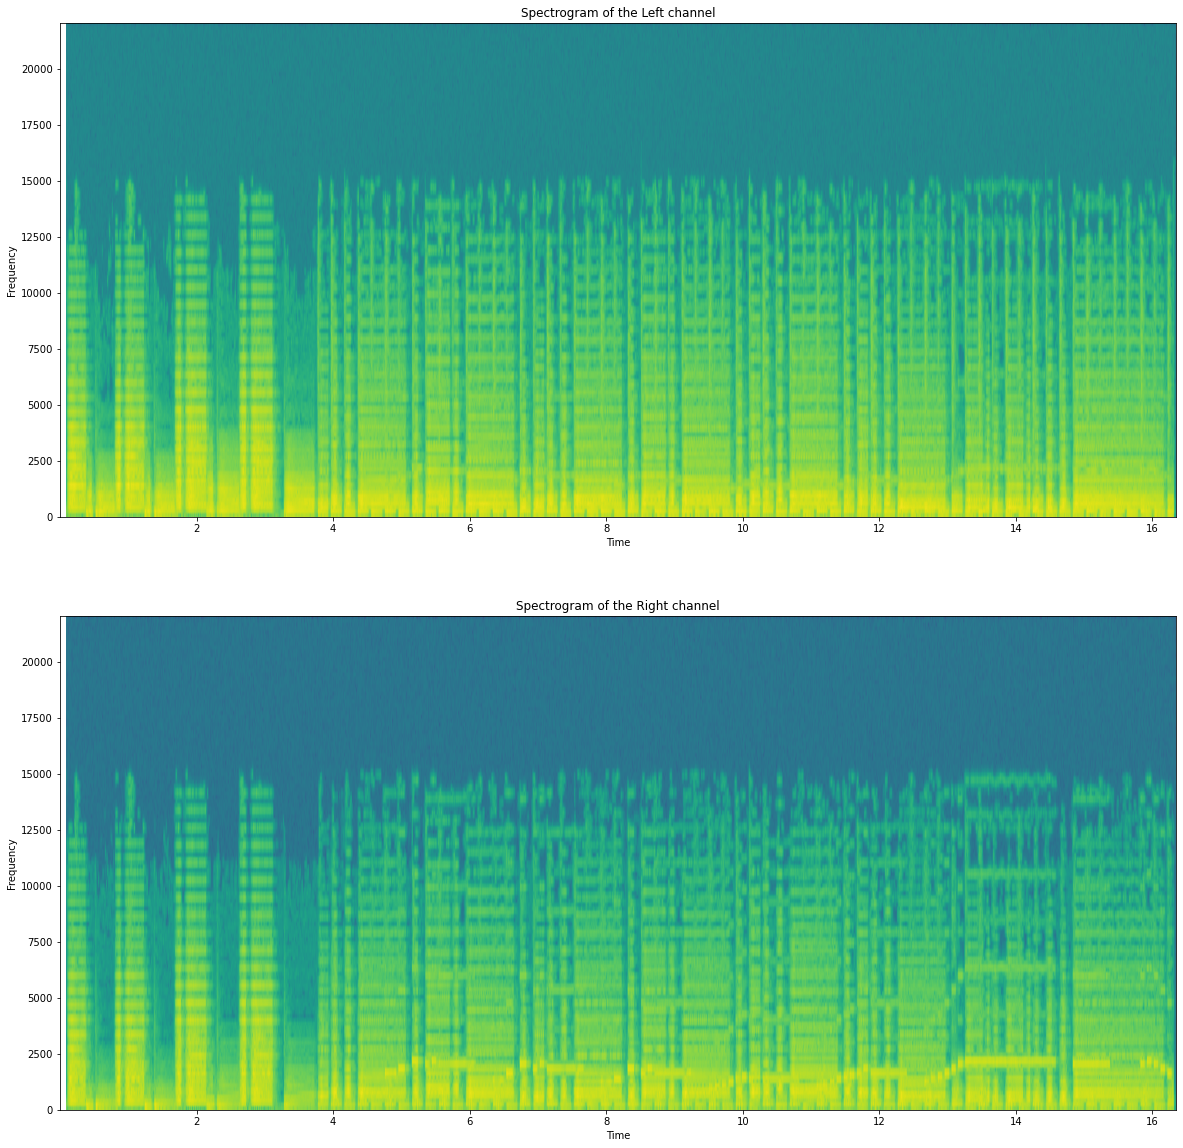

In [8]:
#task3
#import soundfile
data, frequency = sf.read("Track1.wav") #importing the sound file

def plotsoundspectrogram(data,frequency,side): #function for calculating the spectrogram, 0 indicating the left channel, 1 is for the right channel
    if(side == 0):
        plt.subplot(2,1,1)
        plt.specgram(data[:,side], Fs=frequency)
        plt.title("Spectrogram of the Left channel")
        plt.xlabel("Time")
        plt.ylabel("Frequency")
    else:
        plt.subplot(2,1,2)
        plt.specgram(data[:,side], Fs=frequency)
        plt.title("Spectrogram of the Right channel")
        plt.xlabel("Time")
        plt.ylabel("Frequency")
plt.figure(figsize=(20,20))
plotsoundspectrogram(data,frequency,0)        
plotsoundspectrogram(data,frequency,1)           

<BarContainer object of 26 artists>

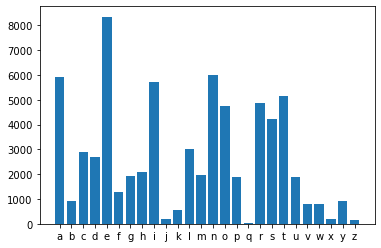

In [9]:
#task4

url = 'https://en.wikipedia.org/wiki/Deep_learning' # the webpage name

response = urllib.request.urlopen(url) #requesting for the url to open
html = response.read()
lowercased_html = BeautifulSoup(html, "html").text.lower() #sorting out the html
letter_counts = Counter(lowercased_html) #counts the letters of the webpage, sorted in a dictionary

filtered_dict = {k:v for (k,v) in letter_counts.items() if k in string.ascii_lowercase} #filtering the dictionary for the letters from a to z
filtered_dict = filtered_dict.items() #get all the items from the filtered dictionary
filtered_dict = sorted(filtered_dict) #sorting the dictionary to alphabetical order, it create a list
newdict = {} #creating a new dictionary, to make a list to dictionary to make it easier to plot the histogram
for k,v in filtered_dict:
    newdict[k] = v
plt.bar(newdict.keys(), newdict.values()) #plotting the histogram
